## **Diamond Price Prediction Projects**
(MAE error: 233.20942639713675 using random forest regressions)
### **Business Understanding**
Diamonds are among the most valuable natural substances, primarily composed of carbon. Unlike gold or silver, pricing diamonds is more complex due to various features influencing their value, such as structure, cut, carat, clarity, and inclusions (impurities).

The pricing system for diamonds is standardized globally through the "four Cs" — Cut, Color, Clarity, and Carat, which allows uniform understanding and ease of trade. These metrics determine the quality and price of diamonds.

### **Understanding the 4 C's**
- **Cut:** Refers to how well a diamond is cut, impacting its brilliance.
- **Color:** A measure of how colorless a diamond is (ranging from D, which is colorless, to J, - which is light yellow).
- **Clarity:** Refers to the internal purity of the diamond (graded from I1, which is the worst, to IF, which is flawless).
- **Carat:** The weight of the diamond.

### **Problem Statement**
We aim to build a system that can predict the price of a diamond based on features such as carat, cut, color, clarity, and its dimensions (x, y, z). This project will walk through steps like data preprocessing, model building, and prediction.

### **Agenda**
In this notebook, we will perform:
- Step:-1) Import necessary libraries and load the datasets
- Step:-2) Preform Exploratory Data Analysis (EDA)
- Step:-3) Data Preparations: Data Cleaning 
- Step:-4) Split the Data into Train and Test Data
- Step:-5) Data Preparations: Feature Transformations (in both train and test data)
- Step:-6) Training and Testing Phase: Building a Models
- Step:-7) Model Evaluation and Predictions

### **Step:-1) Import necessary libraries and load the datasets**

In [79]:
# import neccessary libraries and load the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv("datasets/diamonds.csv")

# Display the few row of the datasets
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [80]:
# Display the columns of the dataset
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [81]:
# Display the shape of the dataset
data.shape

(53940, 10)

In [82]:
# Display the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### **Data Description**

| Feature | Description |
|---------|-------------|
| price   | Price in US dollars (ranging from $326 to $18,823) |
| carat   | Weight of the diamond (0.2 - 5.01) |
| cut     | Quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color   | Diamond color (ranging from J, the worst, to D, the best) |
| clarity | Measurement of how clear the diamond is (I1 to IF) |
| x       | Length in mm (0 - 10.74) |
| y       | Width in mm (0 - 58.9) |
| z       | Depth in mm (0 - 31.8) |
| depth   | Total depth percentage (43 - 79) |
| table   | Width of the top of the diamond (43 - 95) |


### **Step:-2) Preform Exploratory Data Analysis (EDA)**
- A) Univariate Analysis ---> Numerical Columns (carat, depth and table)
- B) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (carat, depth, table)
- C) Univariate Analysis ---> Numerical Columns (x, y, z)
- D) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (x, y, z)
- E) Univariate Analysis ---> Categorical Columns (cut, color and clarity)
- F) Bivariate Analysis ---> Numerical (Target column: Price) vs Categorical Columns (cut, color and clarity)

#### **A) Univariate Analysis ---> Numerical Columns (carat, depth and table)**


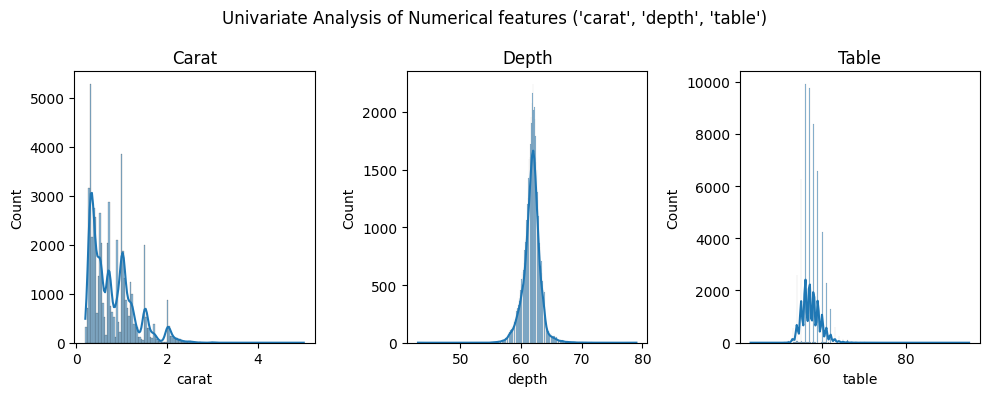

In [83]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Univariate Analysis of Numerical features ('carat', 'depth', 'table')")

# Plot the histogram of carat features
ax[0].set_title("Carat")
sns.histplot(data=data, x='carat', kde=True, ax=ax[0])

# Plot the histogram of depth features
ax[1].set_title("Depth")
sns.histplot(data=data, x='depth', kde=True, ax=ax[1])

# Plot the histogram of table features
ax[2].set_title("Table")
sns.histplot(data=data, x='table', kde=True, ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()

#### **B) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (carat, depth, table)**


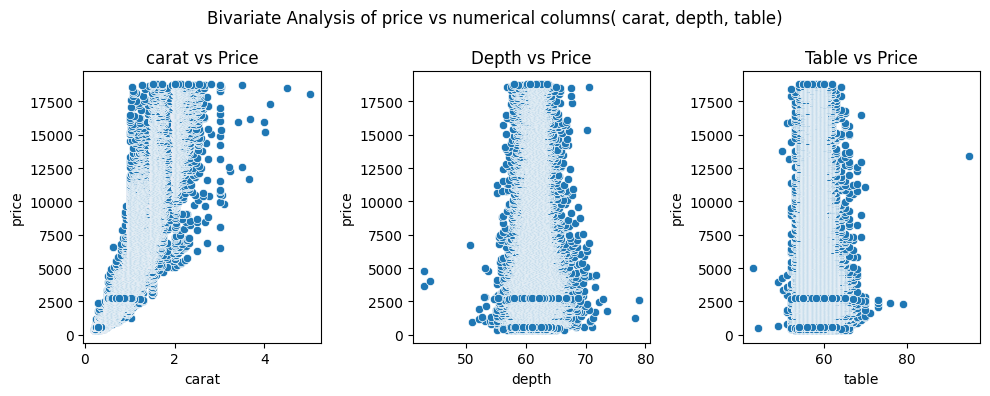

In [84]:
# Create a 1x3 grid of subplots for scatter plots
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
fig.suptitle("Bivariate Analysis of price vs numerical columns( carat, depth, table)")

# Plot the scatter plot of carat vs price
ax[0].set_title("carat vs Price")
sns.scatterplot(data=data, x = "carat", y = "price", ax=ax[0])

# Plot the scatter plot of depth vs price
ax[1].set_title("Depth vs Price")
sns.scatterplot(data=data, x = "depth", y = "price", ax=ax[1])

# Plot the scatter plot of table vs price
ax[2].set_title("Table vs Price")
sns.scatterplot(data=data, x = "table", y = "price", ax=ax[2])

# Adjust layout
plt.tight_layout()
plt.show()

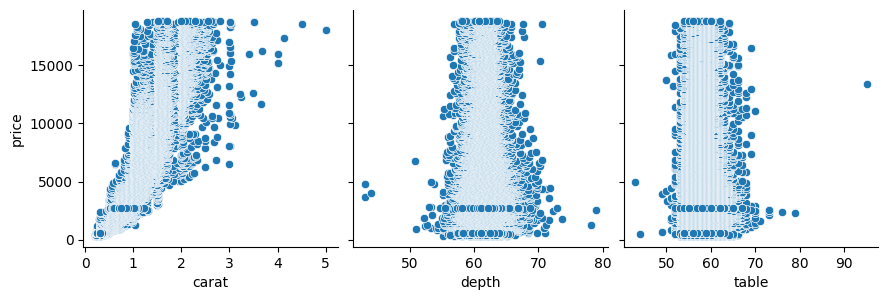

In [85]:
# Pairplot to visualize the relationship between 'price' and selected numerical features
sns.pairplot(data=data, x_vars=["carat", "depth", "table"], y_vars="price", height=3)
plt.show()

#### **C) Univariate Analysis ---> Numerical Columns (x, y, z)**


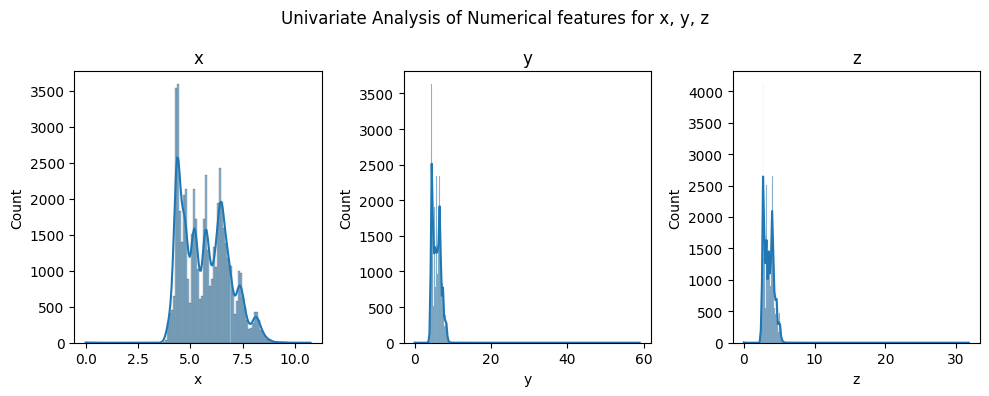

In [86]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1,3, figsize=(10,4))
fig.suptitle("Univariate Analysis of Numerical features for x, y, z")

# Plot the histogram of x features
ax[0].set_title("x")
sns.histplot(data=data, x='x', kde=True, ax=ax[0])

# Plot the histogram of y features
ax[1].set_title("y")
sns.histplot(data=data, x='y', kde=True, ax=ax[1])

# Plot the histogram of z features
ax[2].set_title("z")
sns.histplot(data=data, x='z', kde=True, ax=ax[2])

plt.tight_layout()
plt.show()

#### **D) Bivariate Analysis ---> Numerical (Target column: Price) vs Numerical Columns (x, y, z)**


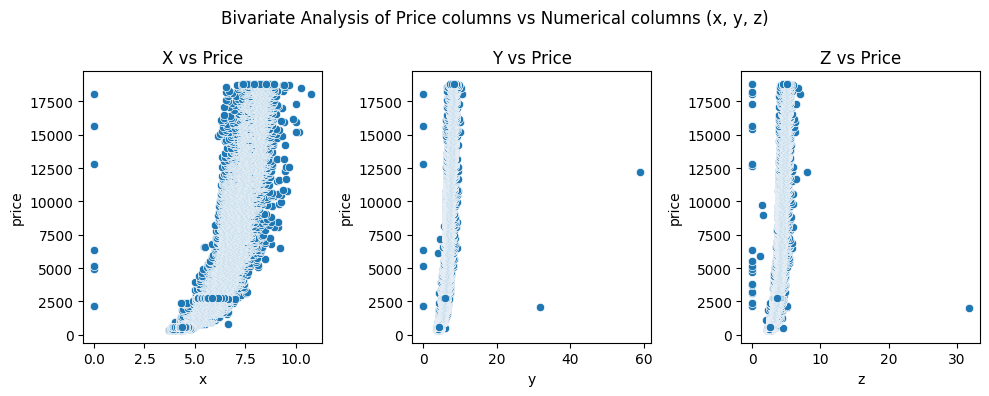

In [87]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle("Bivariate Analysis of Price columns vs Numerical columns (x, y, z)")

# Plot the scatter plot of x vs rice
ax[0].set_title("X vs Price")
sns.scatterplot(data=data, x = "x", y = "price", ax=ax[0])

# Plot the scatter plot of y vs price
ax[1].set_title("Y vs Price")
sns.scatterplot(data=data, x = "y", y = "price", ax=ax[1])

# Plot the scatter plot of z vs price
ax[2].set_title("Z vs Price")
sns.scatterplot(data=data, x = "z", y = "price", ax=ax[2])

# Adjust the layout
plt.tight_layout()
plt.show()

#### **E) Univariate Analysis ---> Categorical Columns (cut, color and clarity)**

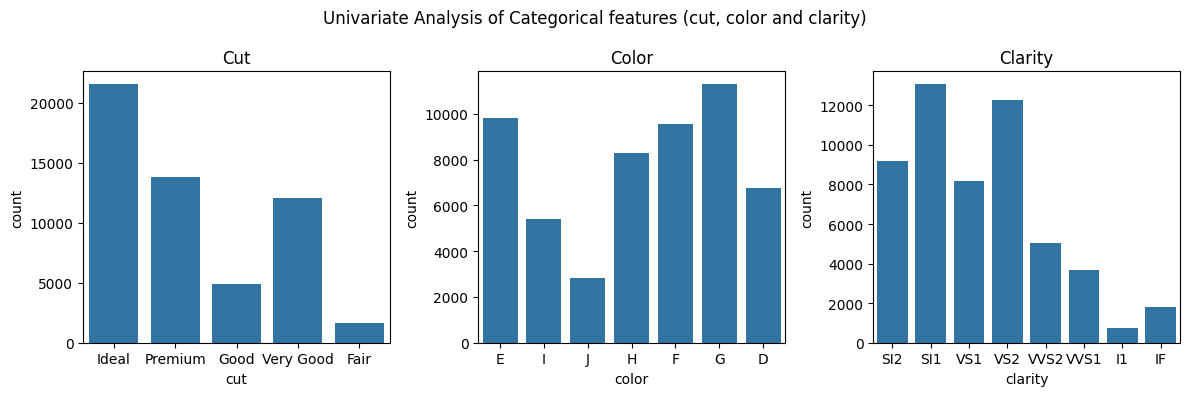

In [88]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1, 3, figsize=(12,4))
fig.suptitle("Univariate Analysis of Categorical features (cut, color and clarity)")

# Plot the count plot of cut feature
ax[0].set_title("Cut")
sns.countplot(data=data, x='cut', ax=ax[0])

# Plot the count plot of color feature
ax[1].set_title("Color")
sns.countplot(data=data, x='color', ax=ax[1])

# Plot the count plot of clarity feature
ax[2].set_title("Clarity")
sns.countplot(data=data, x='clarity', ax=ax[2])

# Adjust the layout
plt.tight_layout()
plt.show()

#### **F) Bivariate Analysis ---> Numerical (Target column: Price) vs Categorical Columns (cut, color and clarity)**


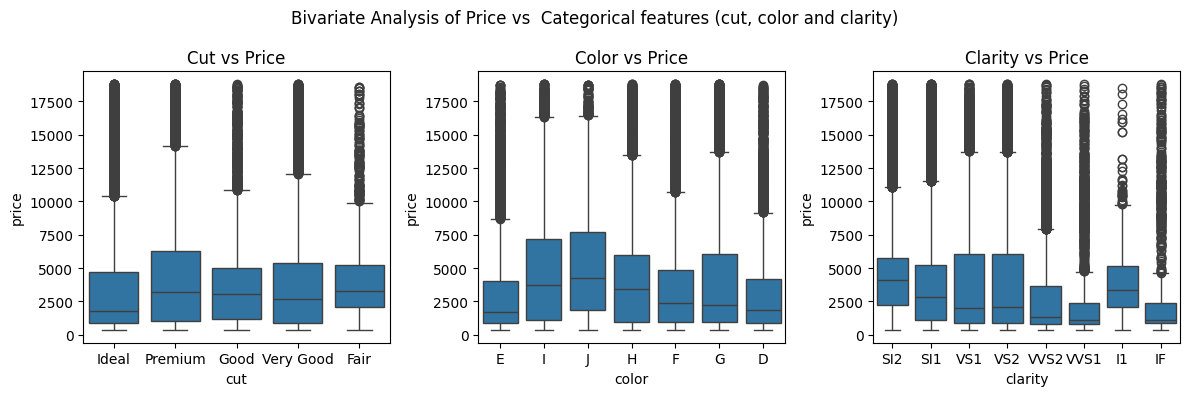

In [89]:
# Create a 1x3 grid of subplots for histogram plots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("Bivariate Analysis of Price vs  Categorical features (cut, color and clarity)")

# Plot the box plot of cut vs price
ax[0].set_title("Cut vs Price")
sns.boxplot(data=data, x='cut', y='price', ax=ax[0])

# Plot the box plot of color vs price
ax[1].set_title("Color vs Price")
sns.boxplot(data=data, x='color', y='price', ax=ax[1])

# Plot the box plot of clarity vs price
ax[2].set_title("Clarity vs Price")
sns.boxplot(data=data, x='clarity', y='price', ax=ax[2])

# Adjust the layout
plt.tight_layout()
plt.show()

### **Step:-3) Data Preparations: Data Cleaning on whole datsets**
- **a) Handling Missing Values:**
          - Impute missing values with mean, median, or mode.
          - Remove rows with missing values if they are negligible.
- **b) Change Data Types:**
          - Convert data types to appropriate formats (e.g., strings to datetime).
          - Ensure all numerical values are in the correct numeric format.
- **c) Drop Duplicate Values:**
          - Identify and remove duplicate rows to avoid redundancy.
- **d) Outlier Detection and Removal using (IQR or Z-score) etc**


#### **Data Cleaning Process in whole datasets:**

In [90]:
# Display information about the X_train data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [91]:
# Check the missing values in the X_train data set
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [92]:
# Filling missing values with mean for numerical columns
# data.fillna(data.mean(), inplace=True)

# Alternatively, you can use median or mode
# data['column_name'].fillna(data['column_name'].median(), inplace=True)
# data['column_name'].fillna(data['column_name'].mode()[0], inplace=True)

# But in my data, there is no any missing value. Sothat, I will not apply. 

In [93]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 146


In [94]:
# Dropping duplicate rows
data.drop_duplicates(inplace=True)

##### **d) Outlier Detection and Removal etc**

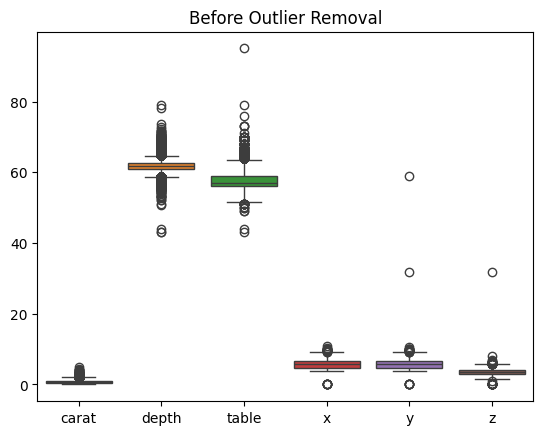

In [95]:
# Define the numerical columns to check for outliers
num_columns = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Boxplot before outlier removal
sns.boxplot(data=data[num_columns])
plt.title("Before Outlier Removal")
plt.show()

In [96]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = data[num_columns].quantile(0.25)
Q3 = data[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# # Filtering out outliers for single columns
# data = X_train[(X_train['numeric_column'] >= lower_bound) & (X_train['numeric_column'] <= upper_bound)]

# Filter out outliers for multiple columns
data_filtered = data[~((data[num_columns] < lower_bound) | (data[num_columns] > upper_bound)).any(axis=1)]
# .any(axis=1) ensures that the condition applies row-wise across the columns.


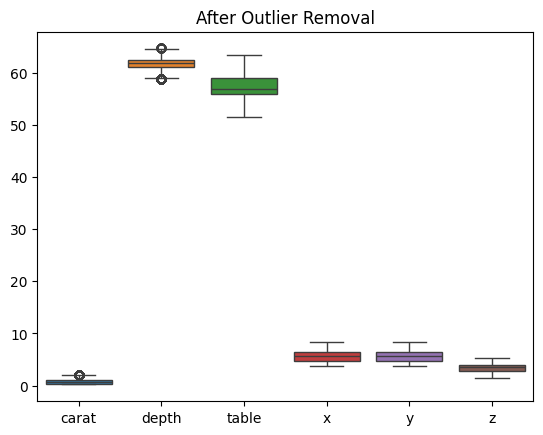

In [97]:
# Boxplot after outlier removal
sns.boxplot(data=data_filtered[num_columns])
plt.title("After Outlier Removal")
plt.show()

In [98]:
# Check the number of rows before and after
print("Number of rows before outlier removal:", data.shape[0])
print("Number of rows after outlier removal:", data_filtered.shape[0])

Number of rows before outlier removal: 53794
Number of rows after outlier removal: 49191


In [99]:
# Display the number of columns presents in X_train data
data_filtered.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [100]:
# check the unique values in the "clarity" column
data_filtered["clarity"].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [101]:
# check the unique values in the "color" column
data_filtered["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [102]:
# check the unique values in the "cut" column
data_filtered["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

#### **Cleaned Datasets that are ready for upcoming process**

In [103]:
print("Cleaned data sets")
print(data_filtered.head())

Cleaned data sets
   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48


### **Step:-4) Split the data into Train and Test data**
     - A) Segregate into input(X) and output(y) (predictor and target variables)
     - B) Split the data into train and test data

#### **A) Segregate into input(X) and output(y) (predictor and target variables)**


In [104]:
# convert the data into predictors and target variables
X = data_filtered.drop(columns = "price")
y = data_filtered["price"]

#### **B) Split the data into train and test data**

In [105]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shape of the training and testing data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (39352, 9)
Shape of X_test: (9839, 9)
Shape of y_train: (39352,)
Shape of y_test: (9839,)


##### =====> After splitting the data into training and testing sets, transformations (like scaling and encoding) should only be applied to the input features (X_train and X_test), not the target variable (y_train, y_test).

##### =====> We apply these transformations separately on X_train and X_test to avoid data leakage.
##### =====> Data cleaning (handling missing value etc), this step we earlier done, so we should not do after that beacuse it may be cause data leakages.(duplicated values, remover outliers, etc). And also for that do align for y_train and y_test data for model fitting. It is not necessary.

### **Step:-5) Data Preparations: Feature Transformations (in both train and test data)**
 - #### **A) Apply Feature Transformations in Training data**
      - ##### **a) Numerical Feature Transformation**
         - Normalization
         - Standardization (We will use this method in this project)

      - ##### **b) Categorical Feature Transformation**
         - One Hot Encoding
         - Label Encoding
         - Ordinal Encoding (We will use this method in this project)

 - #### **B) Apply Feature Transformations in Testing Data**
      - ##### **a) Numerical Feature Transformation**
         - Normalization
         - Standardization (We will use this method in this project)

      - ##### **b) Categorical Feature Transformation**
         - One Hot Encoding
         - Label Encoding
         - Ordinal Encoding (We will use this method in this project)

##### **For our project:**
- Use Ordinal Encoding for categorical features like cut, color, and clarity, as they have an inherent order.
- If working with linear models or distance-based models like KNN, use One-Hot Encoding.
- **One-Hot Encoding** is ideal for unordered categorical variables (nominal data). 
- **Ordinal Encoding** is better for ordered variables (ordinal data). 
- **Label Encoding** works well with tree-based models but may cause issues with non-tree models by imposing artificial ordinal relationships.
- **Normalization:** Scales data to a range (typically between 0 and 1) without altering the data distribution.
- **Standardization:** Scales data based on the mean (0) and standard deviation (1).

#### **A) Apply Feature Transformations in Training data**
- ##### **a) Numerical Feature Transformation**
        - Standardization
- ##### **b) Categorical Feature Transformation**
        - Ordinal Encoding

In [106]:
# Separating numerical and categorical features
X_train_num = X_train.select_dtypes(include = ["int64", "float64"])
X_train_cat = X_train.select_dtypes(include = ["object"])

In [107]:
# Display the few row of the X_train_num data
X_train_num.head()

,carat,depth,table,x,y,z
52203,0.70,61.8,53.0,5.73,5.69,3.53
29195,0.33,62.1,58.0,4.39,4.43,2.74
8743,0.90,63.9,57.0,6.05,6.10,3.88
42654,0.40,61.4,59.0,4.68,4.74,2.89
42718,0.51,60.3,63.0,5.13,5.06,3.07


In [108]:
# Display the few row of the X_train_cat data
X_train_cat.head()

,cut,color,clarity
52203,Ideal,G,SI2
29195,Premium,I,IF
8743,Good,E,SI1
42654,Premium,E,VVS1
42718,Very Good,E,SI1


#### **a) Numerical Feature Transformation: Apply Standardization**

In [109]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
standardizer = StandardScaler()

# Fit and transform the numerical features
X_train_num_standardized = standardizer.fit_transform(X_train_num)

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed numerical features back to a DataFrame
X_train_num_standardized = pd.DataFrame(X_train_num_standardized, 
                                        columns = standardizer.get_feature_names_out(),
                                        index = X_train_num.index)

# Display the few row of the standardized numerical features
X_train_num_standardized.head()

,carat,depth,table,x,y,z
52203,-0.101052,0.014606,-2.117131,0.110763,0.067664,0.092688
29195,-1.022565,0.285982,0.359022,-1.192280,-1.164276,-1.149689
8743,0.397063,1.914237,-0.136209,0.421937,0.468534,0.643109
42654,-0.848225,-0.347229,0.854253,-0.910278,-0.861180,-0.913795
42718,-0.574261,-1.342274,2.835175,-0.472689,-0.548306,-0.630722


In [110]:
# Let's now analyse the properties of 'std_scaler'
print("Number of numerical features:", standardizer.n_features_in_)
print("Output feature names:", standardizer.get_feature_names_out())
print("Mean of each column:", standardizer.mean_)
print("Variations of each column:", standardizer.var_)
print("Std of each column:", np.sqrt(standardizer.var_))

Number of numerical features: 6
Output feature names: ['carat' 'depth' 'table' 'x' 'y' 'z']
Mean of each column: [ 0.7405738  61.78385343 57.27504066  5.61609601  5.62079462  3.4710617 ]
Variations of each column: [0.16121328 1.22208072 4.07741678 1.05752904 1.0460718  0.4043403 ]
Std of each column: [0.40151374 1.1054776  2.01926144 1.02836231 1.02277651 0.63587759]


In [111]:
# Dispaly the statistics for each column of the dataset
X_train_num_standardized.describe()

,carat,depth,table,x,y,z
count,3.935200e+04,3.935200e+04,3.935200e+04,3.935200e+04,3.935200e+04,3.935200e+04
mean,-1.029196e-16,-5.600273e-15,2.874527e-15,-5.183900e-16,3.755664e-17,-3.159813e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.346339e+00,-2.699153e+00,-2.810454e+00,-1.834077e+00,-1.897574e+00,-3.241287e+00
25%,-8.980360e-01,-6.186045e-01,-6.314391e-01,-9.200026e-01,-9.198438e-01,-9.295212e-01
50%,-1.010521e-01,1.050646e-01,-1.362085e-01,-5.927877e-03,-1.055423e-02,-1.739596e-02
75%,6.959319e-01,6.478165e-01,8.542526e-01,8.303533e-01,8.302942e-01,8.318241e-01
max,3.136695e+00,2.637907e+00,3.082790e+00,2.648779e+00,2.590209e+00,2.876243e+00


#### **b) Categorical Feature Transformation: Apply Ordinal Encoding**


In [112]:
# Count the number of unique features in each categorical columns
cut_category = X_train_cat["cut"].unique()
print(cut_category)

color_category = X_train_cat["color"].unique()
print(color_category)

clarity_category = X_train_cat["clarity"].unique()
print(clarity_category)

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['G' 'I' 'E' 'H' 'F' 'D' 'J']
['SI2' 'IF' 'SI1' 'VVS1' 'VS1' 'VS2' 'VVS2' 'I1']


In [113]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[cut_category,color_category,clarity_category],
                                 handle_unknown="use_encoded_value",
                                 unknown_value= -1,
                                 encoded_missing_value=-5)

# Fit and transform the categorical features
# Note: We need to fit the encoder on the training data only, not the entire dataset
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

# column names are (annoyingly) lost after OrdinalEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed categorical features back to a DataFrame
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, 
                                    columns = ordinal_encoder.get_feature_names_out(),
                                    index = X_train_cat.index)

# Display the few row of the encoded categorical features

X_train_cat_encoded.head()

,cut,color,clarity
52203,0.0,0.0,0.0
29195,1.0,1.0,1.0
8743,2.0,2.0,2.0
42654,1.0,2.0,3.0
42718,3.0,2.0,2.0


In [114]:
# Let's now analyse the properties of 'ordinal_encoder'
print("Applied encoding on:", ordinal_encoder.feature_names_in_)
print("Unique Categories:", ordinal_encoder.categories_)
print("Feature Names after encoding:", ordinal_encoder.get_feature_names_out())

Applied encoding on: ['cut' 'color' 'clarity']
Unique Categories: [array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object), array(['G', 'I', 'E', 'H', 'F', 'D', 'J'], dtype=object), array(['SI2', 'IF', 'SI1', 'VVS1', 'VS1', 'VS2', 'VVS2', 'I1'],
      dtype=object)]
Feature Names after encoding: ['cut' 'color' 'clarity']


In [115]:
# Statistics on X_train_cat_encoded
X_train_cat_encoded.describe()

,cut,color,clarity
count,39352.000000,39352.000000,39352.000000
mean,1.133462,2.563580,3.193459
std,1.213159,1.843864,1.963830
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000
50%,1.000000,3.000000,3.000000
75%,2.000000,4.000000,5.000000
max,4.000000,6.000000,7.000000


##### **Concatenate both X_train_num_standardized and X_train_cat_encoded**

In [116]:
# concatenate both X_train_num_standardized and X_train_cat_encoded
X_train_transformed = pd.concat([X_train_num_standardized, X_train_cat_encoded], axis=1)

# Display the few row of the transformed dataset
X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
52203,-0.101052,0.014606,-2.117131,0.110763,0.067664,0.092688,0.0,0.0,0.0
29195,-1.022565,0.285982,0.359022,-1.192280,-1.164276,-1.149689,1.0,1.0,1.0
8743,0.397063,1.914237,-0.136209,0.421937,0.468534,0.643109,2.0,2.0,2.0
42654,-0.848225,-0.347229,0.854253,-0.910278,-0.861180,-0.913795,1.0,2.0,3.0
42718,-0.574261,-1.342274,2.835175,-0.472689,-0.548306,-0.630722,3.0,2.0,2.0


In [117]:
# Checking the shape of X_train_transformed data
X_train_transformed.shape

(39352, 9)

#### **A) Apply Feature Transformations in Testing data**
- ##### **a) Numerical Feature Transformation**
        - Standardization
- ##### **b) Categorical Feature Transformation**
        - Ordinal Encoding

In [118]:
# Separate the numerical and categorical features
X_test_num = X_test.select_dtypes(include=["int64", "float64"])
X_test_cat = X_test.select_dtypes(include = ["object"])

In [119]:
# Display the few row of the X_test_num data
X_test_num.head()

,carat,depth,table,x,y,z
5056,0.30,60.2,56.0,4.40,4.37,2.64
47246,0.50,61.6,57.0,5.08,5.14,3.15
6256,0.92,61.7,59.0,6.18,6.27,3.84
2435,0.70,60.9,60.0,5.75,5.71,3.49
53710,0.71,63.1,56.0,5.68,5.73,3.60


In [120]:
# Display the few row of the X_test_cat data
X_test_cat.head()

,cut,color,clarity
5056,Ideal,D,SI2
47246,Ideal,H,VVS2
6256,Premium,E,SI2
2435,Premium,D,VS1
53710,Good,D,SI1


##### **a) Numerical Features Transformation: -  Apply Standardization**

In [121]:
# Fit and transform the numerical features
X_test_num_standardized = standardizer.transform(X_test_num)

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed numerical features back to a DataFrame
X_test_num_standardized = pd.DataFrame(X_test_num_standardized, 
                                        columns = standardizer.get_feature_names_out(),
                                        index = X_test_num.index)

# Display the few row of the standardized numerical features
X_test_num_standardized.head()

,carat,depth,table,x,y,z
5056,-1.097282,-1.432732,-0.631439,-1.182556,-1.222940,-1.306952
47246,-0.599167,-0.166311,-0.136209,-0.521310,-0.470088,-0.504911
6256,0.446874,-0.075853,0.854253,0.548351,0.634748,0.580203
2435,-0.101052,-0.799522,1.349483,0.130211,0.087219,0.029783
53710,-0.076146,1.190568,-0.631439,0.062142,0.106773,0.202772


##### **b) Categorical Features Transformation: - Apply Ordinal Encoding**

In [122]:
# Fit and transform the categorical features
X_test_cat_encoded = ordinal_encoder.transform(X_test_cat)

# column names are (annoyingly) lost after OrdinalEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Convert the transformed categorical features back to a DataFrame
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded, 
                                    columns = ordinal_encoder.get_feature_names_out(),
                                    index = X_test_cat.index)

# Display the few row of the encoded categorical features
X_test_cat_encoded.head()

,cut,color,clarity
5056,0.0,5.0,0.0
47246,0.0,3.0,6.0
6256,1.0,2.0,0.0
2435,1.0,5.0,4.0
53710,2.0,5.0,2.0


##### **Concatenate both X_test_num_standardized and X_test_cat_encoded**

In [123]:
# Concatenate both X_test_num_standardized and X_test_cat_encoded
X_test_transformed = pd.concat([X_test_num_standardized, X_test_cat_encoded], axis = 1)

# Display the few row of the transformed dataset
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
5056,-1.097282,-1.432732,-0.631439,-1.182556,-1.222940,-1.306952,0.0,5.0,0.0
47246,-0.599167,-0.166311,-0.136209,-0.521310,-0.470088,-0.504911,0.0,3.0,6.0
6256,0.446874,-0.075853,0.854253,0.548351,0.634748,0.580203,1.0,2.0,0.0
2435,-0.101052,-0.799522,1.349483,0.130211,0.087219,0.029783,1.0,5.0,4.0
53710,-0.076146,1.190568,-0.631439,0.062142,0.106773,0.202772,2.0,5.0,2.0


In [124]:
# Check the shape of X_test_transformed data
X_test_transformed.shape

(9839, 9)

### **Step 6: Training and Testing Phase (Linear Regression)**
- #### **A) Training Phase: Building the Linear Regression model by fitting it to the transformed training data.**
- #### **B) Model Evaluation and Predictions:**
    - ##### **a) Evaluating model performance by predicting on the train set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.
    - ##### **b) Evaluating model performance by predicting on the test set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.

#### **A) Training Phase: Building the Linear Regression model by fitting it to the transformed training data.**

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_transformed, y_train)

LinearRegression()

#### **B) Model Evaluation and Predictions:**
MAE is one part of model evaluation for regression, model evaluation itself is a broader process that encompasses more than just this one metric.
Other regression metrics include Mean Squared Error (MSE), R-squared (R²), and Root Mean Squared Error (RMSE).

 - ##### **a) Evaluating model performance by predicting on the train set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.

In [126]:
%%time

# Predict the target variable for the training set using the trained Linear Regression model
y_train_pred = linear_model.predict(X_train_transformed)

# Calculate the Mean Absolute Error (MAE) between the predicted and actual values in the training set
mae_train = mean_absolute_error(y_train, y_train_pred)

# Print the MAE value, which gives an indication of how well the model performs on the training data
print("Mean absolute error of linear regressor model is", mae_train)


Mean absolute error of linear regressor model is 757.1024590991647
CPU times: total: 0 ns
Wall time: 6.57 ms


In [127]:
# Creating a DataFrame to compare the actual training data with the predicted values
output_data_for_train = pd.DataFrame({"Actual Trained data": y_train})

# Adding a new column to the DataFrame with the predictions value
output_data_for_train["Linear Regression Prediction on Training Data"] = y_train_pred

# Displaying the first few rows of the DataFrame to inspect the actual vs predicted values
output_data_for_train.head()


,Actual Trained data,Linear Regression Prediction on Training Data
52203,2480,2391.257249
29195,694,221.369242
8743,4463,4109.074320
42654,1333,977.942224
42718,1340,849.802594


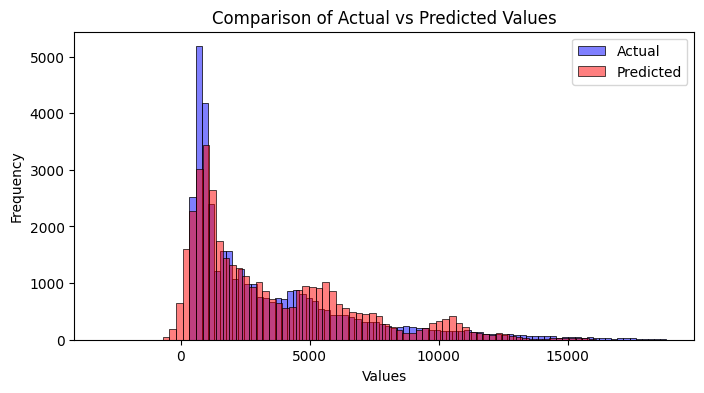

In [128]:
# Plotting histograms to compare the distribution of actual and predicted values
plt.figure(figsize=(8, 4))

# Histogram for actual trained data
sns.histplot(output_data_for_train["Actual Trained data"], alpha=0.5, label='Actual', color='blue')

# Histogram for linear regression predictions on training data
sns.histplot(output_data_for_train["Linear Regression Prediction on Training Data"], alpha=0.5, label='Predicted', color='red')

# Adding title and labels
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **B) Model Evaluation and Predictions:**
- ##### **b) Evaluating model performance by predicting on the test set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.

In [129]:
%%time

# Predict the target variable for the testing set
y_test_pred = linear_model.predict(X_test_transformed)

# Calculate the Mean Absolute Error (MAE) between the predicted and actual values in the testing set
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the MAE value, which gives an indication of how well the model performs on the testing data
print("Mean absolute error of linear regressor model is", mae_test)


Mean absolute error of linear regressor model is 745.1653365909092
CPU times: total: 0 ns
Wall time: 3.03 ms


In [130]:
# Creating a DataFrame to compare the actual testing data with the predicted values
output_data_for_test = pd.DataFrame({"Actual Tested data": y_test})

# Adding a new column to the DataFrame with the predictions value
output_data_for_test["Linear Regression Prediction on Testing Data"] = y_test_pred

# Displaying the first few rows of the DataFrame to inspect the actual vs predicted values
output_data_for_test.head()

,Actual Tested data,Linear Regression Prediction on Testing Data
5056,574,-113.630707
47246,1842,2176.669287
6256,4011,4086.953715
2435,3183,2641.490066
53710,2719,2450.624729


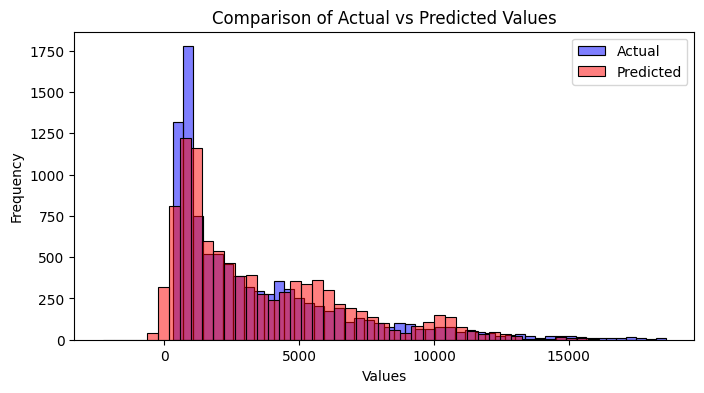

In [131]:
# Plotting histograms to compare the distribution of actual and predicted values
plt.figure(figsize=(8, 4))

# Histogram for actual tested data
sns.histplot(output_data_for_test["Actual Tested data"], alpha=0.5, label='Actual', color='blue')

# Histogram for linear regression predictions on testing data
sns.histplot(output_data_for_test["Linear Regression Prediction on Testing Data"], alpha=0.5, label='Predicted', color='red')

# Adding title and labels
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **Step 6: Training and Testing Phase (KNN Regression)**
- #### **A) Training Phase: Building the KNN Regression model by fitting it to the transformed training data.**
- #### **B) Model Evaluation and Predictions:**
    - ##### **a) Evaluating model performance by predicting on the train set.**
    - ##### **b) Evaluating model performance by predicting on the test set.**

#### **A) Training Phase: Building the KNN Regression model by fitting it to the transformed training data.**

In [132]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
# Instantiate the KNN Regression model
knn_model = KNeighborsRegressor()

# Fit the model to the training data
knn_model.fit(X_train_transformed, y_train)

KNeighborsRegressor()

#### **B) Model Evaluation and Predictions:**
 - ##### **a) Evaluating model performance by predicting on the train set.**

In [133]:
%%time
y_train_pred = knn_model.predict(X_train_transformed)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean absolute error of knn regressor model is", mae_train)

Mean absolute error of knn regressor model is 285.83372128481403
CPU times: total: 766 ms
Wall time: 1.17 s


In [134]:
output_data_for_train["KNN Regression Prediction on Training Data"] = y_train_pred
output_data_for_train.head()

,Actual Trained data,Linear Regression Prediction on Training Data,KNN Regression Prediction on Training Data
52203,2480,2391.257249,2072.4
29195,694,221.369242,802.4
8743,4463,4109.074320,4252.6
42654,1333,977.942224,1276.2
42718,1340,849.802594,1170.2


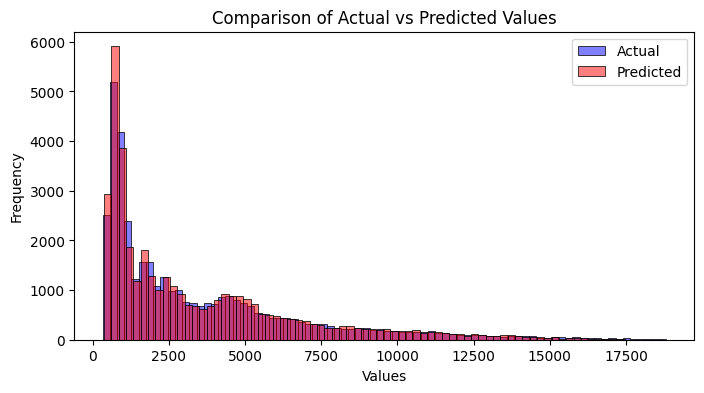

In [135]:
plt.figure(figsize=(8, 4))
sns.histplot(output_data_for_train["Actual Trained data"], alpha=0.5, label='Actual', color='blue')
sns.histplot(output_data_for_train["KNN Regression Prediction on Training Data"], alpha=0.5, label='Predicted', color='red')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **B) Model Evaluation and Predictions:**
- ##### **b) Evaluating model performance by predicting on the test set.**

In [136]:
%%time
y_test_pred = knn_model.predict(X_test_transformed)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean absolute error of knn regressor model is", mae_test)

Mean absolute error of knn regressor model is 354.963736152048
CPU times: total: 109 ms
Wall time: 304 ms


In [137]:
output_data_for_test["KNN Regression Prediction on Testing Data"] = y_test_pred
output_data_for_test.head()

,Actual Tested data,Linear Regression Prediction on Testing Data,KNN Regression Prediction on Testing Data
5056,574,-113.630707,531.8
47246,1842,2176.669287,1722.6
6256,4011,4086.953715,3682.8
2435,3183,2641.490066,3103.2
53710,2719,2450.624729,2444.4


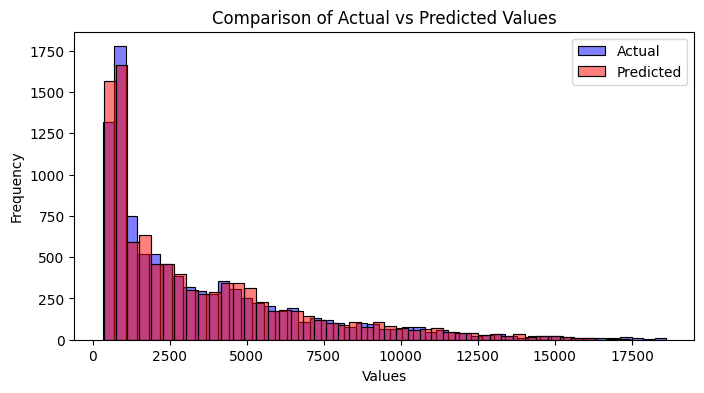

In [138]:
plt.figure(figsize=(8, 4))
sns.histplot(output_data_for_test["Actual Tested data"], alpha=0.5, label='Actual', color='blue')
sns.histplot(output_data_for_test["KNN Regression Prediction on Testing Data"], alpha=0.5, label='Predicted', color='red')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### **Step 6: Training and Testing Phase (Decision Tree (DT) Regression)**
- #### **A) Training Phase: Building the Decision Tree (DT) model by fitting it to the transformed training data.**
- #### **B) Model Evaluation and Predictions:**
    - ##### **a) Evaluating model performance by predicting on the train set.**
    - ##### **b) Evaluating model performance by predicting on the test set.**
              

#### **A) Training Phase: Building the Decision Tree Regression model by fitting it to the transformed training data.**

In [139]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Instantiate the Decision Tree Regression model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

#### **B) Model Evaluation and Predictions:**
 - ##### **a) Evaluating model performance by predicting on the train set.**

In [140]:
%%time
y_train_pred = dt_model.predict(X_train_transformed)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean absolute error of decision tree regressor model is", mae_train)

Mean absolute error of decision tree regressor model is 0.3390170766415938
CPU times: total: 15.6 ms
Wall time: 21.1 ms


In [141]:
output_data_for_train["Decision Tree Regression Prediction on Training Data"] = y_train_pred
output_data_for_train.head()

,Actual Trained data,Linear Regression Prediction on Training Data,KNN Regression Prediction on Training Data,Decision Tree Regression Prediction on Training Data
52203,2480,2391.257249,2072.4,2480.0
29195,694,221.369242,802.4,694.0
8743,4463,4109.074320,4252.6,4463.0
42654,1333,977.942224,1276.2,1333.0
42718,1340,849.802594,1170.2,1340.0


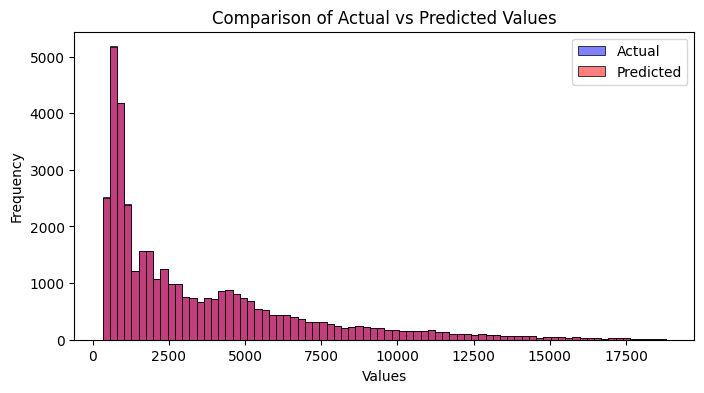

In [142]:
plt.figure(figsize=(8, 4))
sns.histplot(output_data_for_train["Actual Trained data"], alpha=0.5, label='Actual', color='blue')
sns.histplot(output_data_for_train["Decision Tree Regression Prediction on Training Data"], alpha=0.5, label='Predicted', color='red')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **B) Model Evaluation and Predictions:**
- ##### **b) Evaluating model performance by predicting on the test set.**

In [143]:
%%time
y_test_pred = dt_model.predict(X_test_transformed)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean absolute error of decision tree regressor model is", mae_test)

Mean absolute error of decision tree regressor model is 302.58974489277364
CPU times: total: 0 ns
Wall time: 11.1 ms


In [144]:
output_data_for_test["Decision Tree Regression Prediction on Testing Data"] = y_test_pred
output_data_for_test.head()

,Actual Tested data,Linear Regression Prediction on Testing Data,KNN Regression Prediction on Testing Data,Decision Tree Regression Prediction on Testing Data
5056,574,-113.630707,531.8,593.0
47246,1842,2176.669287,1722.6,1877.0
6256,4011,4086.953715,3682.8,4011.0
2435,3183,2641.490066,3103.2,3501.0
53710,2719,2450.624729,2444.4,2757.0


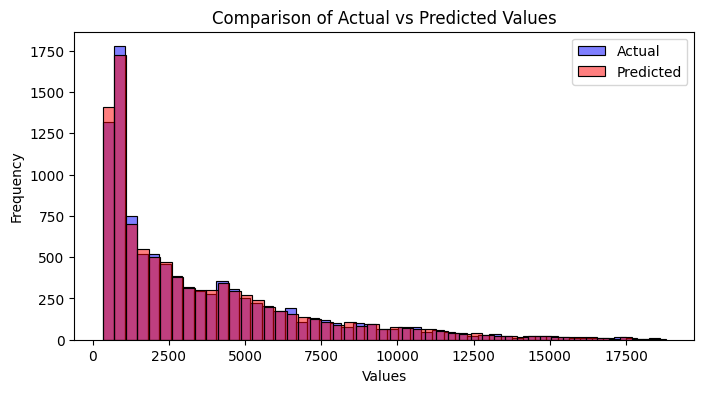

In [145]:
plt.figure(figsize=(8, 4))
sns.histplot(output_data_for_test["Actual Tested data"], alpha=0.5, label='Actual', color='blue')
sns.histplot(output_data_for_test["Decision Tree Regression Prediction on Testing Data"], alpha=0.5, label='Predicted', color='red')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **Step 6: Training and Testing Phase (Random Forest  Regression)**
- #### **A) Training Phase: Building the Random Forest Regression model by fitting it to the transformed training data.**
- #### **B) Model Evaluation and Predictions:**
    - ##### **a) Evaluating model performance by predicting on the train set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.
    - ##### **b) Evaluating model performance by predicting on the test set.**
              - Measuring error using metrics like Mean Absolute Error (MAE).
              - Visualizing the difference between actual and predicted prices to assess model accuracy.

#### **A) Training Phase: Building the Random Forest Regression model by fitting it to the transformed training data.**

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Instantiate the Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train_transformed, y_train)

RandomForestRegressor()

#### **B) Model Evaluation and Predictions:**
 - ##### **a) Evaluating model performance by predicting on the train set.**

In [147]:
%%time
y_train_pred = rf_model.predict(X_train_transformed)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean absolute error of random forest regressor model is", mae_train)

Mean absolute error of random forest regressor model is 88.32255259590285
CPU times: total: 562 ms
Wall time: 1.05 s


In [148]:
output_data_for_train["Random Forest Regression Prediction on Training Data"] = y_train_pred
output_data_for_train.head()

,Actual Trained data,Linear Regression Prediction on Training Data,KNN Regression Prediction on Training Data,Decision Tree Regression Prediction on Training Data,Random Forest Regression Prediction on Training Data
52203,2480,2391.257249,2072.4,2480.0,2317.740000
29195,694,221.369242,802.4,694.0,700.450000
8743,4463,4109.074320,4252.6,4463.0,4260.880000
42654,1333,977.942224,1276.2,1333.0,1322.190000
42718,1340,849.802594,1170.2,1340.0,1312.573167


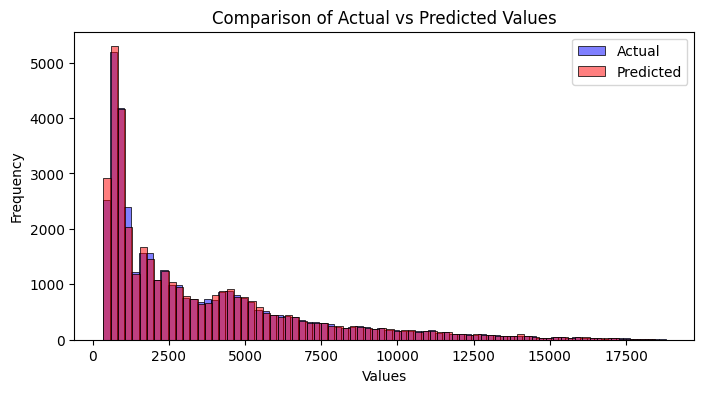

In [149]:
plt.figure(figsize=(8, 4))
sns.histplot(output_data_for_train["Actual Trained data"], alpha=0.5, label='Actual', color='blue')
sns.histplot(output_data_for_train["Random Forest Regression Prediction on Training Data"], alpha=0.5, label='Predicted', color='red')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **B) Model Evaluation and Predictions:**
- ##### **b) Evaluating model performance by predicting on the test set.**

In [150]:
%%time
y_test_pred = rf_model.predict(X_test_transformed)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean absolute error of rando forest regressor model is", mae_test)

Mean absolute error of rando forest regressor model is 233.3609605078268
CPU times: total: 203 ms
Wall time: 299 ms


In [151]:
output_data_for_test["Random Forest Regression Prediction on Testing Data"] = y_test_pred
output_data_for_test.head()

,Actual Tested data,Linear Regression Prediction on Testing Data,KNN Regression Prediction on Testing Data,Decision Tree Regression Prediction on Testing Data,Random Forest Regression Prediction on Testing Data
5056,574,-113.630707,531.8,593.0,542.42
47246,1842,2176.669287,1722.6,1877.0,1811.75
6256,4011,4086.953715,3682.8,4011.0,3807.28
2435,3183,2641.490066,3103.2,3501.0,3326.24
53710,2719,2450.624729,2444.4,2757.0,2740.62


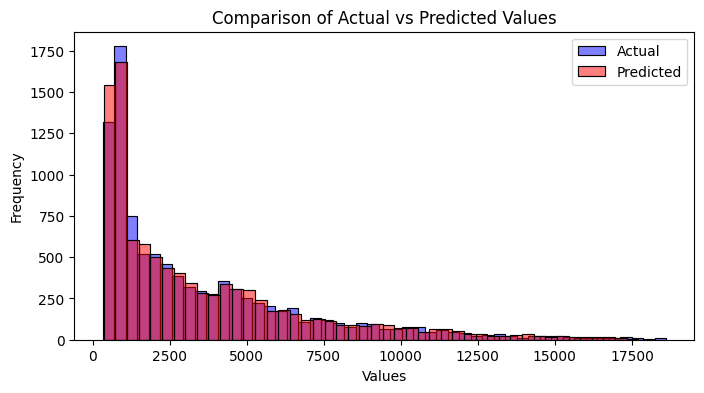

In [152]:
plt.figure(figsize=(8, 4))
sns.histplot(output_data_for_test["Actual Tested data"], alpha=0.5, label='Actual', color='blue')
sns.histplot(output_data_for_test["Random Forest Regression Prediction on Testing Data"], alpha=0.5, label='Predicted', color='red')
plt.title('Comparison of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### **Combime all the model**

In [153]:
data_melted = pd.melt(output_data_for_test, var_name="Model", value_name="Predictions")
data_melted.head()

,Model,Predictions
0,Actual Tested data,574.0
1,Actual Tested data,1842.0
2,Actual Tested data,4011.0
3,Actual Tested data,3183.0
4,Actual Tested data,2719.0


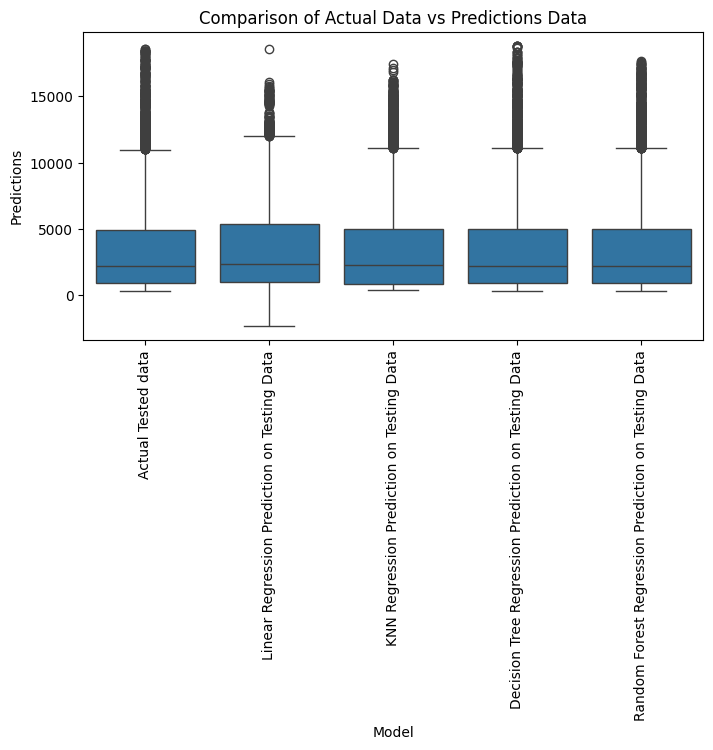

In [154]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.boxplot(x="Model", y="Predictions", data=data_melted, ax=ax)
plt.title("Comparison of Actual Data vs Predictions Data")
plt.xticks(rotation = 90)
plt.show()

#### **Model Saved**

##### **Using joblib (recommended for large models):**

In [155]:
import joblib

# Save the model to a file
joblib.dump(linear_model, "Models/linear_model.pkl")
joblib.dump(knn_model, "Models/knn_model.pkl")
joblib.dump(dt_model, "Models/dt_model.pkl")
joblib.dump(rf_model, "Models/rf_model.pkl")

['Models/rf_model.pkl']

##### **Using pickle (good for smaller models):**

In [156]:
# import pickle

# # Save the model to a file
# with open('linear_model.pkl', 'wb') as file:
#     pickle.dump(linear_model, file)

#### =====> For our web application, we use random forest regressions model because of less mae error comparison to others models.